In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples


import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.cm as cm


In [5]:
#Generating the sample data from make_blobs
X,y=make_blobs(n_samples=500,n_features=2,centers=4,cluster_std= 1,
               center_box=(-10.0, 10.0),random_state=1,shuffle=True)

# Parameter	                Meaning
# n_samples=500	            You are generating 500 data points in total.
# n_features=2	            Each data point will have 2 features (i.e., 2D points).
# centers=4	                There will be 4 clusters (i.e., 4 groupings or blobs).
# cluster_std=1	            The standard deviation of each cluster. Higher values = looser clusters.
# center_box=(-10.0, 10.0)	Each cluster center will be randomly placed within this box (range of x and y from -10 to 10).
# random_state=1	        This sets the seed for reproducibility. You'll get the same blobs every time you run this.
# shuffle=True	            The generated samples are shuffled randomly.




range_n_clusters=[2,3,4,5,6]

# This list is typically used to try different 
# numbers of clusters (e.g., in silhouette analysis or elbow method) 
# to determine the optimal number of clusters for KMeans or other clustering algorithms.

In [6]:
X

array([[-6.92324165e+00, -1.06695320e+01],
       [-8.63062033e+00, -7.13940564e+00],
       [-9.63048069e+00, -2.72044935e+00],
       [-2.30647659e+00,  5.30797676e+00],
       [-7.57005366e+00, -3.01446491e+00],
       [-1.00051011e+00,  2.77905153e+00],
       [-4.81826839e+00, -2.77214822e+00],
       [-5.33964799e+00, -1.27625764e+00],
       [-7.94308840e+00, -3.89993901e+00],
       [-5.54924525e+00, -3.41298968e+00],
       [-5.14508990e+00, -9.54492198e+00],
       [-7.09669936e+00, -8.04074036e+00],
       [-5.82641512e+00, -1.96346196e+00],
       [-1.83198811e+00,  3.52863145e+00],
       [-7.34267235e+00, -3.16546482e+00],
       [-7.34072825e+00, -6.92427252e+00],
       [-7.94653906e+00, -3.36768655e+00],
       [-8.24598536e+00, -8.61315821e+00],
       [-1.98197711e+00,  4.02243551e+00],
       [-4.35098035e+00, -3.69476678e+00],
       [-1.04768696e+01, -3.60318139e+00],
       [-1.10195984e+01, -3.15882031e+00],
       [-5.17255904e+00, -4.31835971e+00],
       [-2.

In [8]:
y

array([2, 2, 1, 0, 3, 0, 3, 3, 1, 3, 2, 2, 3, 0, 3, 2, 1, 2, 0, 3, 1, 1,
       3, 0, 3, 3, 0, 0, 1, 3, 2, 0, 3, 2, 3, 2, 1, 1, 2, 1, 3, 1, 0, 3,
       3, 2, 1, 3, 0, 0, 0, 1, 1, 3, 2, 1, 1, 1, 1, 3, 0, 0, 1, 3, 0, 3,
       2, 3, 1, 1, 2, 1, 3, 2, 3, 3, 2, 3, 3, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 2, 1, 3, 0, 2, 2, 3, 2, 0, 0, 2, 0, 1, 0, 3, 3, 0, 0, 1,
       3, 2, 0, 1, 0, 1, 0, 3, 0, 3, 1, 2, 2, 1, 3, 1, 0, 2, 2, 3, 0, 1,
       1, 1, 1, 2, 0, 3, 0, 0, 3, 2, 3, 0, 0, 0, 3, 3, 2, 2, 1, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 3, 0, 2, 1, 3, 2, 0, 1,
       1, 1, 1, 2, 3, 1, 0, 2, 2, 1, 3, 2, 2, 3, 0, 0, 2, 2, 3, 0, 3, 2,
       2, 0, 2, 1, 0, 3, 3, 2, 3, 1, 2, 3, 1, 3, 1, 2, 3, 3, 3, 0, 1, 0,
       3, 2, 1, 3, 1, 1, 1, 0, 3, 0, 2, 1, 2, 1, 0, 0, 1, 2, 0, 2, 3, 1,
       2, 2, 2, 2, 3, 1, 2, 1, 3, 0, 0, 3, 3, 0, 1, 3, 1, 0, 3, 0, 1, 1,
       0, 3, 2, 2, 1, 1, 1, 3, 0, 0, 3, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 0,
       0, 3, 1, 1, 1, 3, 3, 3, 2, 0, 2, 1, 2, 3, 2,

Text(0, 0.5, 'WCSS')

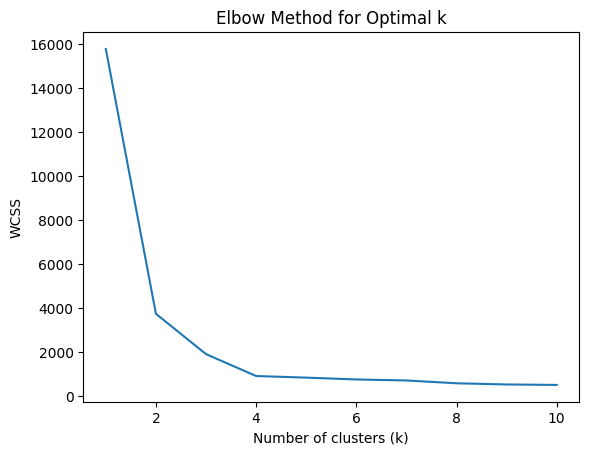

In [ ]:
from sklearn.cluster import KMeans
#within cluster sum of squares
wcss=[]

for i in range(1,11): # i means no of k values, rememer the graph we construct using different k values and calculate wcss for each k value
   kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
   kmeans.fit(X)
   wcss.append(kmeans.inertia_)  # inertia_ is the sum of squared distances to closest cluster center   


# Plotting the WCSS to find the optimal number of clusters
plt.plot(range(1,11),wcss)
plt.title('Elbow Method for Optimal k') 
plt.xlabel('Number of ("cluster")clusters (k)')
plt.ylabel('WCSS')  # Within-cluster sum of squares

In [12]:
#as you can see the elbow point (Abrupt change) is at 4, so we can choose k=4
clusterer=KMeans(n_clusters=4,random_state=10)
cluster_labels=clusterer.fit_predict(X)# The fit_predict method fits the KMeans model to the data and returns the cluster labels for each data point.
print(cluster_labels)

[3 3 0 1 2 1 2 2 2 2 3 3 2 1 2 3 2 3 1 2 0 0 2 1 2 2 1 1 0 2 3 1 2 3 2 3 0
 0 3 0 2 0 1 2 2 3 0 2 1 1 1 0 0 2 3 0 0 0 0 2 1 1 0 2 1 2 3 2 0 0 3 0 2 3
 2 2 3 2 2 0 1 1 0 1 1 0 0 1 0 0 1 3 0 2 1 3 3 2 3 1 1 3 1 0 1 2 2 1 1 0 2
 3 1 0 1 0 1 2 1 2 0 3 3 0 2 0 1 3 3 2 1 0 0 0 0 3 1 2 1 1 2 3 2 1 1 1 2 2
 3 3 0 0 1 3 1 0 0 0 0 0 0 0 0 0 1 3 3 3 2 1 3 0 2 3 1 0 0 0 0 3 2 0 1 3 3
 0 2 3 3 2 1 1 3 3 2 1 2 3 3 1 3 0 1 2 2 3 2 0 3 2 0 2 0 3 2 2 2 1 0 1 2 3
 0 2 0 0 0 1 0 1 3 0 3 0 1 1 0 3 1 3 2 0 3 3 3 3 2 0 3 0 2 1 1 2 2 1 0 2 0
 1 2 1 0 0 1 2 3 3 0 0 0 2 1 1 2 1 0 3 1 3 1 3 3 1 3 1 1 2 0 0 0 2 2 0 3 1
 3 3 3 2 0 2 3 0 3 3 0 3 3 0 1 3 2 2 1 1 0 3 1 1 2 3 1 1 2 0 1 0 2 3 3 1 0
 3 2 1 1 2 2 2 3 2 1 1 0 1 1 1 1 3 3 2 1 0 2 3 1 0 1 2 1 0 2 0 1 2 2 3 1 3
 3 3 3 3 3 0 3 1 3 1 1 0 1 2 0 0 3 1 0 1 2 3 0 0 3 0 0 1 1 3 0 2 1 2 2 3 3
 2 3 0 0 3 0 3 0 1 3 1 0 2 1 0 2 1 3 2 1 1 0 2 0 2 3 1 3 2 1 3 3 3 0 1 2 3
 2 2 0 0 3 2 2 2 2 2 2 3 2 0 3 2 1 2 1 2 0 0 1 1 1 0 2 0 3 0 1 2 3 1 3 1 3
 2 1 1 3 0 2 3 0 0 0 3 2 

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4948\2565796649.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(X[:, 0],X[:, 1],marker='.',s=30, lw=0,alpha=0.7,c=color,edgecolor='k')


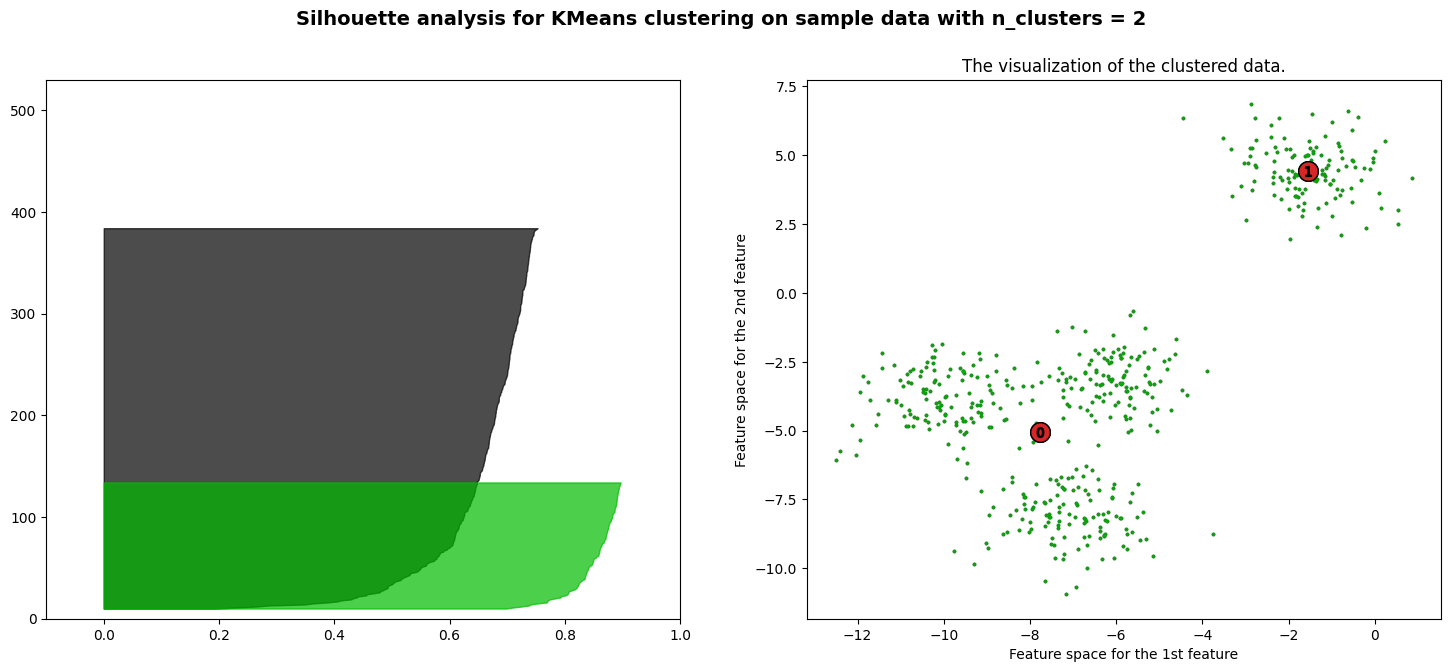

For n_clusters = 3 The average silhouette_score is : 0.5882004012129721


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4948\2565796649.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(X[:, 0],X[:, 1],marker='.',s=30, lw=0,alpha=0.7,c=color,edgecolor='k')


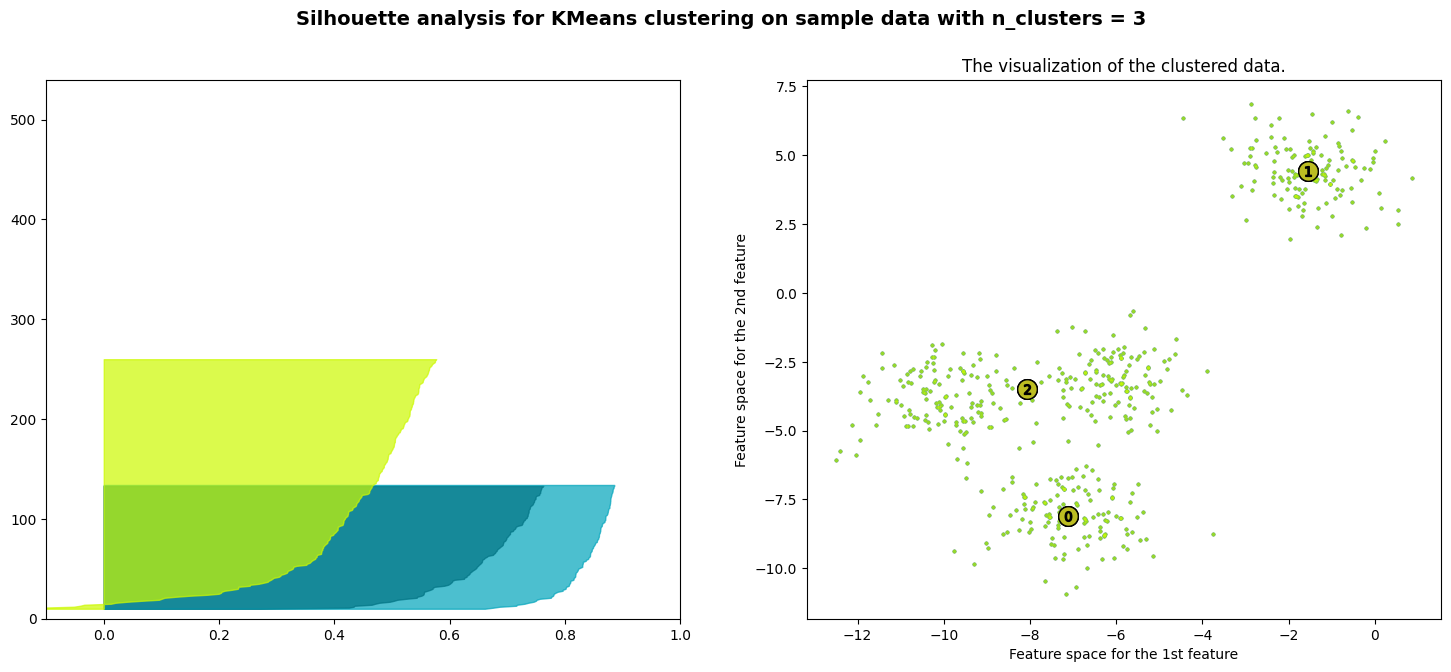

For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4948\2565796649.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(X[:, 0],X[:, 1],marker='.',s=30, lw=0,alpha=0.7,c=color,edgecolor='k')


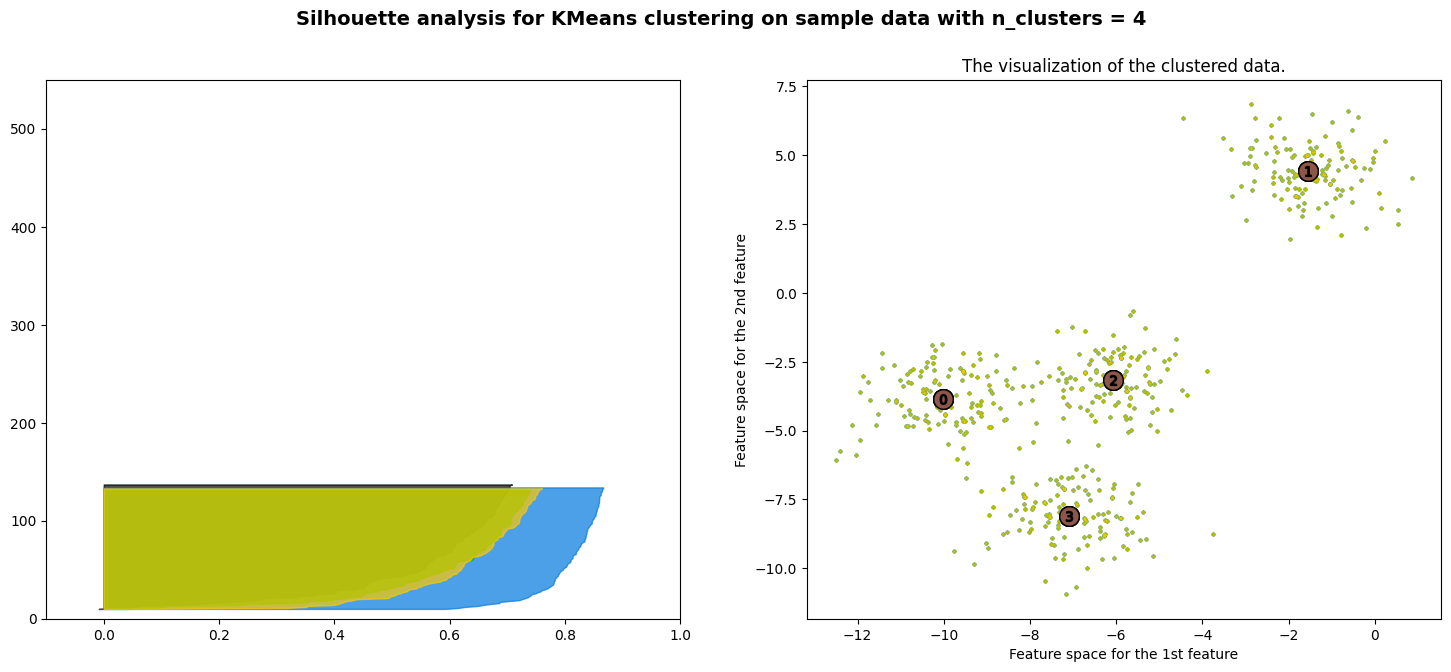

For n_clusters = 5 The average silhouette_score is : 0.561464362648773


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4948\2565796649.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(X[:, 0],X[:, 1],marker='.',s=30, lw=0,alpha=0.7,c=color,edgecolor='k')


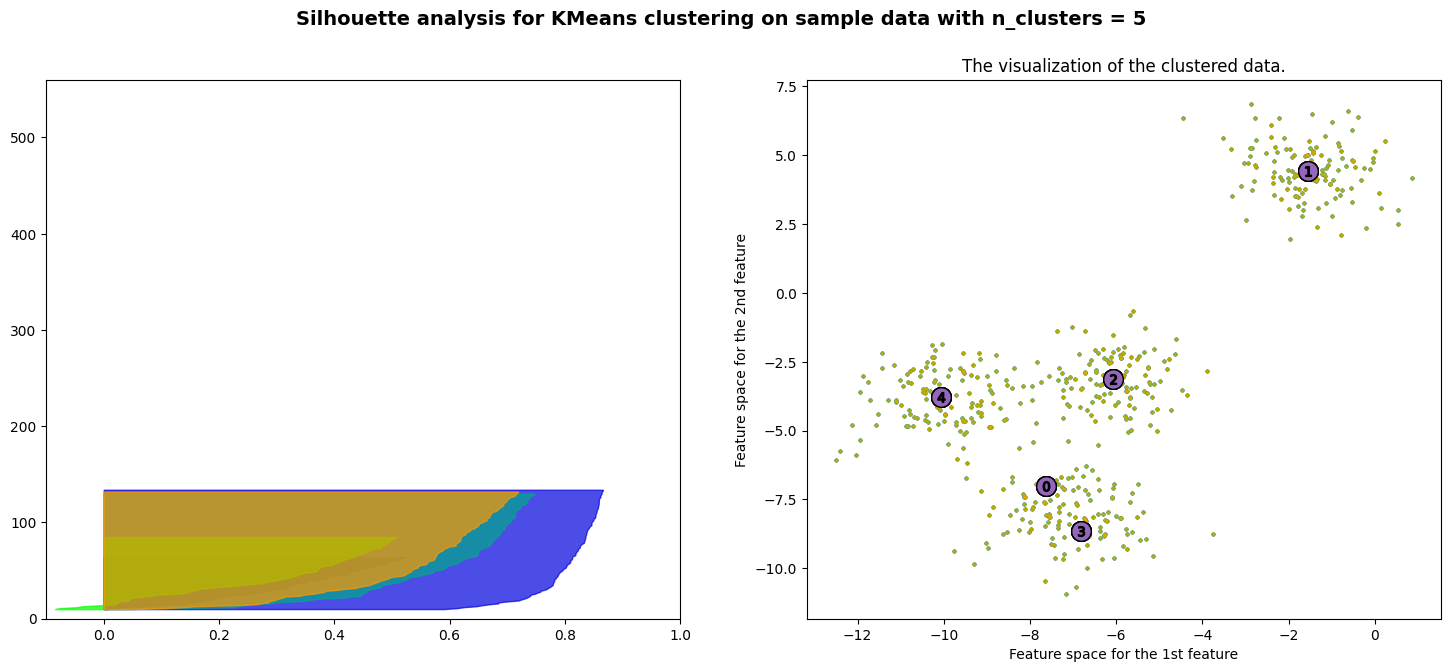

For n_clusters = 6 The average silhouette_score is : 0.4857596147013469


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4948\2565796649.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(X[:, 0],X[:, 1],marker='.',s=30, lw=0,alpha=0.7,c=color,edgecolor='k')


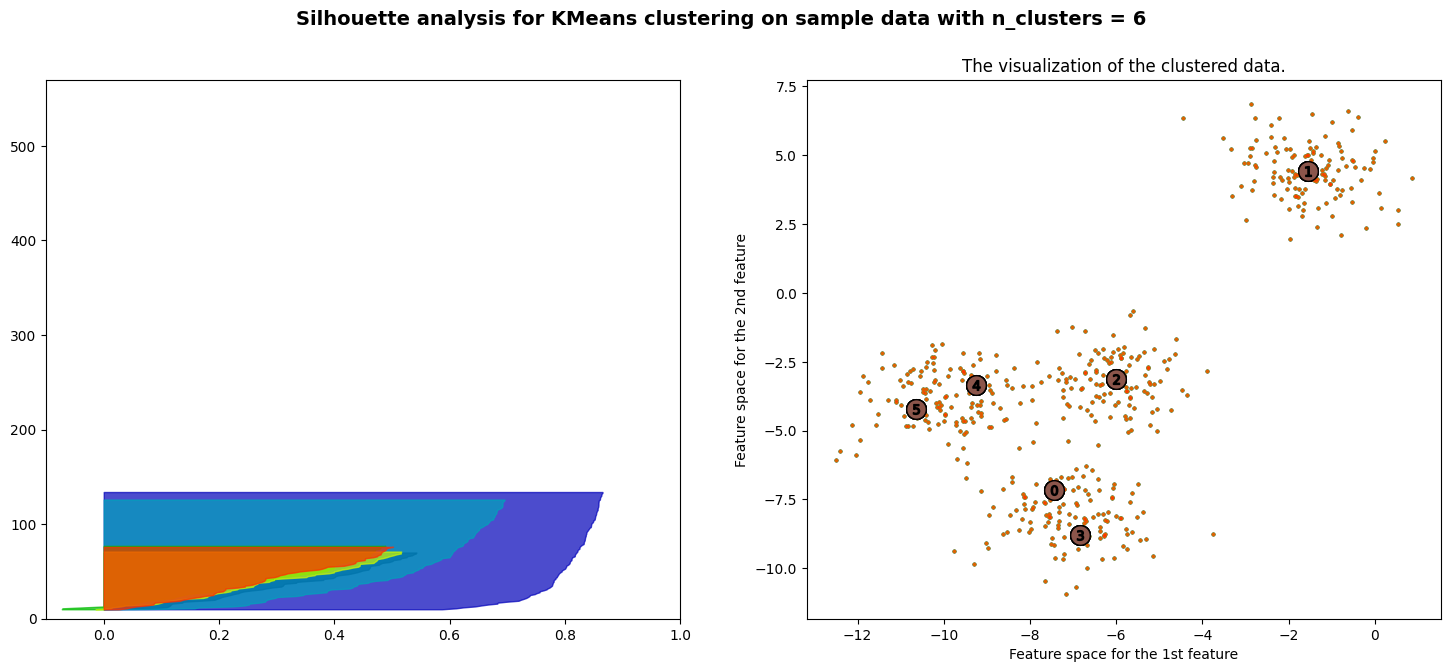

In [15]:
for n_clusters in range_n_clusters:
    #create a subplot for each number of clusters
    fig, (ax1,ax2)=plt.subplots(1,2)
    fig.set_size_inches(18,7)
    fig.suptitle("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters, fontsize=14, fontweight='bold')
    # The suptitle method sets a title for the entire figure, which is useful when you have multiple subplots.
    # The first subplot is for the silhouette plot
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters + 1) * 10 is used to create space for the silhouette scores of each cluster.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    # The x-axis limits are set to [-0.1, 1] to accommodate the silhouette scores,

    #initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    # The fit_predict method fits the KMeans model to the data and returns the cluster labels for each data point.


    # The silhouetter score gives the average silhouette score for all samples, which is a measure of how well-separated the clusters are.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    #compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        #aggregate the sihuette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values= sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        
        color = cm.nipy_spectral(float(i) / n_clusters)


        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # The fill_betweenx method fills the area between two horizontal curves, which is used to visualize the silhouette scores for each cluster.
        ax2.scatter(X[:, 0],X[:, 1],marker='.',s=30, lw=0,alpha=0.7,c=color,edgecolor='k')


        centers=clusterer.cluster_centers_
        # The cluster_centers_ attribute contains the coordinates of the cluster centers.
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o', s=200, edgecolor='k')
        for i,c in enumerate(centers):
            ax2.scatter(c[0],c[1],marker='$%d$' % i,alpha=1,s=50,edgecolor='k')
        

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature") 
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters, fontsize=14, fontweight='bold')
    
    plt.show()